<a href="https://colab.research.google.com/github/harkiran-b/cs280_project/blob/main/FinalReport_FA23_EK_HB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTE TO STUDENTS

Delete this code cell at the end.  

* EVERY code cell must have a comment in it at the top explaining what is in the code cell.

* There should be normal coding comments within the code cell too, especially if there is anything unexpected or not obvious happening in the code.

* NOOOOOOOOOO code cell should include any interpretations of the data.  Those remarks should be in markdown cells  directly before or after the code cells.

**Please delete the bolded comments from Dr. R before submission.**

In [29]:
# ALL imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
#### CS 280 Final Project - FA23
---

# The Secret Behind Video Game Reviews

### By: Erica Kurpiewski and Harkiran Bhullar


---

## 1. Introduction

For this project, our group explored... (This section will be finished at a later date and can be skipped at this time.)

---

## 2. Data

A direct link to the data can be found at the following website.
 * https://www.kaggle.com/datasets/kendallgillies/video-game-sales-and-ratings

**According to the website, the data is "a combined web scrape from VGChartz and Metacritic along with manually entered year of release values for most games with a missing year of release" as of January 2017.**

In [30]:
#importing the data from github
video_games = pd.read_csv("https://raw.githubusercontent.com/harkiran-b/cs280_project/main/Video_Game_Sales_as_of_Jan_2017.csv")
video_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01,64.0,7.0,NaN,NaN,E
17412,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002.0,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009.0,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN


In [31]:
#Renaming of columns to fit specifications
video_games = video_games.rename(columns = {'Name':'name', 'Platform':'console', 'Year_of_Release':'release_year', 'Genre':'genre', 'Publisher':'publisher',
                              'NA_Sales':'sales_in_north_a', 'EU_Sales':'sales_in_europe', 'JP_Sales':'sales_in_japan', 'Other_Sales':'other_sales',
                              'Global_Sales':'total_global_sales', 'Critic_Score':'critic_score', 'Critic_Count':'num_critic_reviews',
                              'User_Score':'user_score', 'User_Count':'num_user_reviews', 'Rating':'rating_ESRB'})
video_games

,name,console,release_year,genre,publisher,sales_in_north_a,sales_in_europe,sales_in_japan,other_sales,total_global_sales,critic_score,num_critic_reviews,user_score,num_user_reviews,rating_ESRB
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01,64.0,7.0,NaN,NaN,E
17412,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002.0,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009.0,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN


### 2.1 Summary of Variables within the Video Games Table

The "video_games" table has 15 columns/variables and 17,416 rows. We now explain each variable, giving their units, indicating their types, and providing some descriptive statistics..

**Categorical variables:**

* **name** – The name/title of the video game
  * Number of missing values: 0
  * Contains 12,080 distinct values:
    * Ex: Wii Sports, Super Mario Bros., God of War, Banjo-Kazooie, Sonic the Hedgehog
  * Any other important facts, should you discover them during your analysis.
    * Some games are listed more than once due to being released on multiple consoles

* **console** – The console that the game was released on
    * Number of missing values: 0
    * Contains 31 distinct values:
        * Ex: 2600 (Atari 2600), G (Gameboy), SCD (Sega CD), GEN (Sega Genesis), SAT (Sega Saturn), WS (WonderSwan), NG (Neo Geo)
    * Any other important facts, should you discover them during your analysis.

* **release_year** – The year that the game was initially released
    * Number of missing values: 8
    * Contains 42 distinct values:
        * Ex: 1999, 2008, 2013
    * Any other important facts, should you discover them during your analysis.

* **genre** – The primary classification of the game based on how it is played
    * Number of missing values: 0
    * Contains 12 distinct values:
        * Sports - inspired by/based around actual sports
        * Platform - primary focus is traversing across areas
        * Racing - players race vehicles in fantasy areas or simulated real-world tracks
        * Role-Playing - character grows in strength and experience as the game progresses
        * Puzzle - solve various puzzles like Sudoku
        * Misc - catch-all category for other sub-genres such as fitness, rhythm, trivia, and sandbox
        * Shooter - players participate in action by using ranged weapons against other players/enemies
        * Simulation - simulating real world or ficitional scenarios
        * Action - focuses on challenges that require hand-eye coordination and fine motor skills
        * Fighting - focuses on close-ranged combat, mostly one-on-one brawls
        * Adventure - explore environments through character interactions or puzzles
        * Strategy - requires careful thinking and planning to progress
    * Any other important facts, should you discover them during your analysis.
        * Some games are categorized by multiple genres, but the dataset lists the main genre in the column.
        * Misceallneous does not mean that a game is classified by multiple genres

* **publisher** – The name of the company that published the game
    * Number of missing values: 1
    * Contains 627 distinct values:
        * Ex: Nintendo, SEGA, Activision, Blizzard, Square Enix
    * Any other important facts, should you discover them during your analysis.

* **rating_ESRB** – The rating the Entertainment Software Ratings Board gave the game
    * Number of missing values: 7,164
    * Contains 8 distinct values:
        * E - For everyone, any age can play
        * M - For Mature audiences, ages 17 and up
        * T - for teens, ages 13 and up
        * E10+ - For everyone ages 10 and up
        * K-A - Kids to adults
        * AO - For Adults, ages 18 and up
        * EC - Early childhood
        * RP - Rating Pending, has not been assigned a final rating
    * Any other important facts, should you discover them during your analysis.
        * The ESRB only provides ratings for North America. Europe uses PEGI (Pan-European Game Information) and Japan uses CERO (Computer Entertainment Rating Organization). So, the rows (games) without an ESRB rating were either released before the ERSB was established or they were only released in Eurpoe or Japan.
        * The 'K-A' rating was replaced with the 'E' rating in 1998, and the 'EC' rating was discontinued in 2018 as it still fits under the 'E' rating

**Continuous variables:**

* **column_name** – description
    * Number of missing values:
    * Units: if necessary; delete otherwise.
    * max value: XXX
    * min value: XXX
    * average value:
    * Any other important facts, should you discover them during your analysis.

* **sales_in_north_a** - Sales in North America (in millions)
    * Number of missing values: 0
    * Units: Millions
    * max value: 41.36
    * min value: 0
    * average value: 0.2545

* **sales_in_europe** - Sales in Europe (in millions)
    * Number of missing values: 0
    * Units: Millions
    * max value: 28.96
    * min value: 0
    * average value: 0.1407

* **sales_in_japan** - Sales in Japan (in millions)
    * Number of missing values: 0
    * Units: Millions
    * max value: 10.22
    * min value: 0
    * average value: 0.075

* **other_sales** - Sales in the rest of the world (in millions)
    * Number of missing values: 0
    * Units: Millions
    * max value: 10.57
    * min value: 0
    * average value: 0.0459

* **total_global_sales** - Total worldwide sales (in millions)
    * Number of missing values: 0
    * Units: Millions
    * max value: 82.54
    * min value: 0
    * average value: 0.5164

**Quantitative Discrete Variables:**

* **user_score** – The average score given by users on Metacritic
    * Number of missing values: 9,618
    * max value: 9.7
    * min value: 0.0
    * average value: 7.117056
    * The user score rating is out of 10

* **num_user_reviews** – The number of users that left a score/review on a game
    * Number of missing values: 9,618
    * max value: 10,766
    * min value: 4
    * average value: 162.672480

* **critic_score** - Aggregate score compiled by Metacritic staff
    * Number of missing values: 9080
    * Units: #/100
    * max value: 98.00
    * min value: 13.00
    * average value: 68.9125

* **num_critic_reviews** - The number of critics used in coming up with the critic score
    * Number of missing values: 9080
    * Units: #/100
    * max value: 113.00
    * min value: 3.00
    * average value: 26.1920

### 2.2 Code used to Summarize Variables

In this section we include the code used to describe the variables in the previous section.  

In [32]:
#1: Descriptive Stats for "name"
print(video_games['name'].nunique(),'unique values\n', video_games['name'].isna().sum(), 'missing values')

12080 unique values
 0 missing values


In [33]:
#2: Descriptive Stats for "console"
num_consoles = video_games['console'].nunique()
print(num_consoles,'unique values\n',video_games['console'].isna().sum(), 'missing values\n', video_games['console'].unique())

31 unique values
 0 missing values
 ['Wii' 'NES' 'G' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'X' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [34]:
#3: Descriptive Stats for "release_year"
print(video_games['release_year'].nunique(),'unique values\n', video_games['release_year'].isna().sum(),'missing values')

42 unique values
 8 missing values


In [35]:
#4: Descriptive Stats for "genre"
num_genres = video_games['genre'].nunique()
print(num_genres,'unique values\n', video_games['genre'].isna().sum(), 'missing values\n',video_games['genre'].unique())

12 unique values
 0 missing values
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [36]:
#5: Descriptive Stats for "publisher"
print(video_games['publisher'].nunique(),'unique values\n', video_games['publisher'].isna().sum(),'missing values')

627 unique values
 1 missing values


In [37]:
#6: Descriptive Stats for "rating_ESRB"
num_ESRB_ratings = video_games['rating_ESRB'].nunique()
print(num_ESRB_ratings,'unique values\n', video_games['rating_ESRB'].isna().sum(), 'missing values\n',video_games['rating_ESRB'].unique())

8 unique values
 7164 missing values
 ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [38]:
#7: Descriptive Stats for "user_score"
print(video_games['user_score'].isna().sum(),'missing values\n', video_games['user_score'].describe())

9618 missing values
 count    7798.000000
mean        7.117056
std         1.502410
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


In [39]:
#8: Descriptive Stats for "num_user_reviews"
print(video_games['num_user_reviews'].isna().sum(),'missing values\n', video_games['num_user_reviews'].describe())

9618 missing values
 count     7798.000000
mean       162.672480
std        562.837954
min          4.000000
25%         10.000000
50%         25.000000
75%         81.000000
max      10766.000000
Name: num_user_reviews, dtype: float64


In [40]:
#9: Descriptive Stats for "sales_in_north_a"
print('Missing values: ', video_games['sales_in_north_a'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['sales_in_north_a'].describe())

Missing values:  0 
Descriptive Stats:
 count    17416.000000
mean         0.254534
std          0.800673
min          0.000000
25%          0.000000
50%          0.070000
75%          0.230000
max         41.360000
Name: sales_in_north_a, dtype: float64


In [41]:
#10: Descriptive Stats for "sales_in_europe"
print('Missing values: ', video_games['sales_in_europe'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['sales_in_europe'].describe())

Missing values:  0 
Descriptive Stats:
 count    17416.000000
mean         0.140727
std          0.497341
min          0.000000
25%          0.000000
50%          0.020000
75%          0.100000
max         28.960000
Name: sales_in_europe, dtype: float64


In [42]:
#11: Descriptive Stats for "sales_in_japan"
print('Missing values: ', video_games['sales_in_japan'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['sales_in_japan'].describe())

Missing values:  0 
Descriptive Stats:
 count    17416.000000
mean         0.075020
std          0.303412
min          0.000000
25%          0.000000
50%          0.000000
75%          0.030000
max         10.220000
Name: sales_in_japan, dtype: float64


In [43]:
#12: Descriptive Stats for "other_sales"
print('Missing values: ', video_games['other_sales'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['other_sales'].describe())

Missing values:  0 
Descriptive Stats:
 count    17416.000000
mean         0.045908
std          0.183932
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64


In [44]:
#13: Descriptive Stats for "total_global_sales"
print('Missing values: ', video_games['total_global_sales'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['total_global_sales'].describe())

Missing values:  0 
Descriptive Stats:
 count    17416.000000
mean         0.516469
std          1.526124
min          0.010000
25%          0.050000
50%          0.160000
75%          0.450000
max         82.540000
Name: total_global_sales, dtype: float64


In [45]:
#14: Descriptive Stats for "critic_score"
print('Missing values: ', video_games['critic_score'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['critic_score'].describe())

Missing values:  9080 
Descriptive Stats:
 count    8336.000000
mean       68.912548
std        13.964937
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


In [46]:
#15: Descriptive Stats for "num_critic_reviews"
print('Missing values: ', video_games['num_critic_reviews'].isna().sum(),
      '\nDescriptive Stats:\n', video_games['num_critic_reviews'].describe())

Missing values:  9080 
Descriptive Stats:
 count    8336.000000
mean       26.192059
std        18.991526
min         3.000000
25%        11.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: num_critic_reviews, dtype: float64


---

## Playground

#### Vis 1: Exploring the total sales of each region for each genre

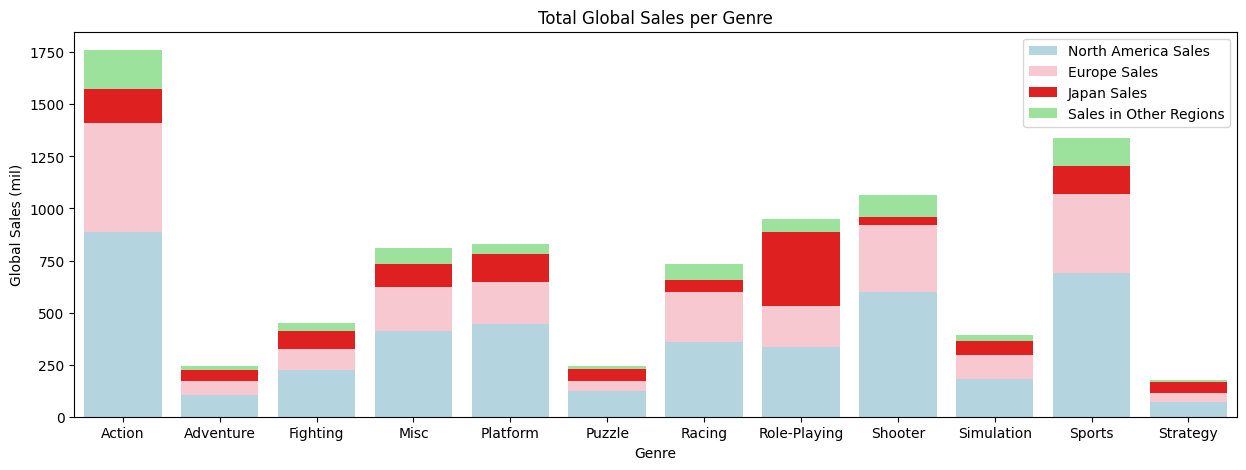

In [47]:
grped_genres = video_games.groupby(by=['genre']).agg({'sales_in_north_a':'sum','sales_in_europe':'sum',
                                                      'sales_in_japan':'sum','other_sales':'sum'}).reset_index()
plt.figure(figsize = (15, 5))
sns.barplot(data = grped_genres, x = "genre", y = "sales_in_north_a", label = "North America Sales", color = "lightblue", errwidth = 0)
sns.barplot(data = grped_genres, x = "genre", y = "sales_in_europe", label = "Europe Sales", color = "pink", errwidth = 0,
           bottom = grped_genres['sales_in_north_a'])
sns.barplot(data = grped_genres, x = "genre", y = "sales_in_japan", label = "Japan Sales", color = "red", errwidth = 0,
           bottom = grped_genres['sales_in_north_a'] + grped_genres['sales_in_europe'])
sns.barplot(data = grped_genres, x = "genre", y = "other_sales", label = "Sales in Other Regions", color = "lightgreen", errwidth = 0,
           bottom = grped_genres['sales_in_north_a'] + grped_genres['sales_in_europe'] + grped_genres['sales_in_japan'])
plt.title("Total Global Sales per Genre")
plt.xlabel("Genre")
plt.ylabel("Global Sales (mil)")
plt.legend();

Based on the graph, action games have the greatest total amount of sales for all genres, with sports games following with the second greatest total. North America, for almost all genres, generates the most sales. The sole exception being Role-playing games where Japan has the greatest sales. For each region their 3 most popular genres, based on sales, are Action, Sports, and Shooters for North America, Action, Sports, and Shooters again for Europe, Role-playing, Action, and Sports for Japan, and Action, Sport, and Shooters for other regions.

#### Vis 2: Do critics rate games higher than users or vice versa?

In [48]:
video_games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 8.8, 7.5, 2.6,
       7.2, 7. , 9.2, 7.3, 4.9, 4.3, 6.5, 7.6, 5.7, 9.1, 6.9, 9.4, 6.8,
       3.5, 6.1, 5.4, 4. , 6.2, 4.5, 9.3, 4.2, 6. , 6.7, 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 5.9, 4.6, 3.9, 3.1, 2.9, 5.2, 5. , 5.1, 3.3, 4.7,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 9.6, 1.8, 3.8,
       0. , 1.6, 2.4, 1.7, 1.1, 1. , 0.3, 1.5, 1.2, 0.2, 2.3, 0.5, 1.3,
       0.6, 1.4, 0.9, 0.7, 9.7])

In [49]:
video_games['user_score_scaled'] = video_games['user_score'] * 10

Text(0.5, 0, 'score')

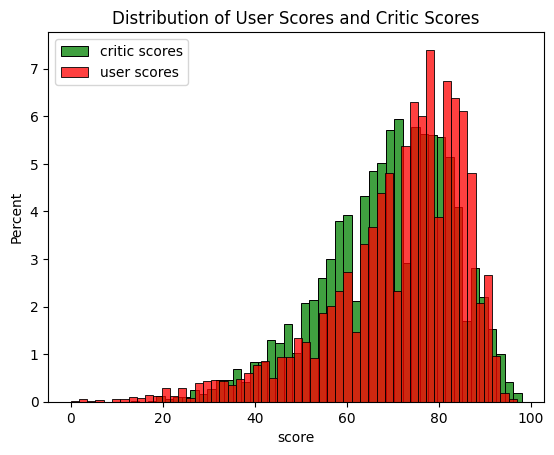

In [50]:
sns.histplot(data = video_games, x = 'critic_score', stat = 'percent', color = 'green', label = 'critic scores')
sns.histplot(data = video_games, x = 'user_score_scaled', stat = 'percent', color = 'red', label = 'user scores')
plt.legend()

plt.title('Distribution of User Scores and Critic Scores')
plt.xlabel('score')

From this visualization we learn that overall, user scores are higher than critic scores. This helps us determine what we want ot look for in our next visualizations. So there is some factor that leads users to score video games higher than critics and we can try to focus in on this with our next visualizations.

#### Vis 3: Exploring the differences in the number or reviews between critics and users based on genre.

In [51]:
reviews_per_genre = video_games[['genre', 'num_critic_reviews', 'num_user_reviews']].groupby('genre').count().reset_index()
reviews_per_genre

,genre,num_critic_reviews,num_user_reviews
0,Action,1933,1878
1,Adventure,342,314
2,Fighting,418,409
3,Misc,528,446
4,Platform,501,435
5,Puzzle,232,135
6,Racing,756,653
7,Role-Playing,759,766
8,Shooter,963,945
9,Simulation,367,358


Text(0, 0.5, 'num reviews')

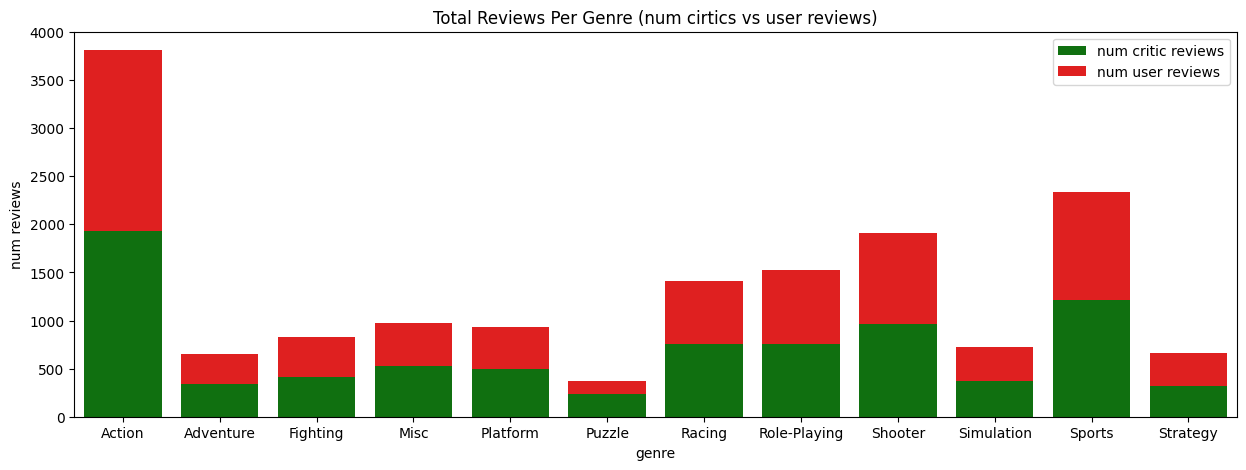

In [52]:
plt.figure(figsize = (15, 5))
sns.barplot(reviews_per_genre, x = 'genre', y = 'num_critic_reviews',
            color = 'green',
            label = 'num critic reviews')
sns.barplot(reviews_per_genre, x = 'genre', y = 'num_user_reviews',
            color = 'red',
            label = 'num user reviews',
            bottom = reviews_per_genre['num_critic_reviews'])
plt.legend()

plt.title('Total Reviews Per Genre (num cirtics vs user reviews)')
plt.ylabel('num reviews')

From this graph we can observe that the action genre had the highest number of reviwes overall. We can also see an almost 50//50 split between the number of critic vs user reviews. For the rest of the genres we can observe that there are slightly more critic reviews than user reviews. This is important to note, especially giving the fact that in the previous visualization we saw that critics rates lower overall in scores.

---
## 3. Results

You're welcome to organize your final file as needed.  You will certainly need a results section and a conclusion section.

---

## 4. Conclusion